In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat_2 = []
lngs_2 = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat_2.append(lat_lng[0])
        lngs_2.append(lat_lng[1])
        

# Print the city count to confirm sufficient count
len(cities)

619

In [3]:
#Set Up DF to store city and weather info

cities_df = pd.DataFrame({'Cities' : cities, 'Latitude' : lat_2, 'Longitude' : lngs_2 })
cities_df['Temperature (F)'] = ""
cities_df['Humidity (%)']= ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (MPH)'] = ""

cities_df.head()

,Cities,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,santa maria,16.437459,-20.811864,,,,
1,victoria,-8.883731,58.819606,,,,
2,lebu,-30.992286,-94.356819,,,,
3,praia da vitoria,40.146456,-26.046091,,,,
4,port elizabeth,-82.543008,35.062636,,,,


## Perform API Calls

In [4]:
# Construct URL to use in calls

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
params = {
    'appid' : api_key,
}

#Grab and Format Exact Time of Data Pull

right_now = time.localtime()
time_string  = time.strftime("%H:%M on %Y.%m.%d", right_now)

#Itterate through the cities in the DataFrame

for index, row in cities_df.iterrows():
    check_city = row['Cities']
    params['q'] = check_city

    print(f"Retrieving Results for Index {index}: {check_city}.")
    
    response = requests.get(url, params=params).json()
    
#Ensure that if there is no data for city it will be skipped
    
    try:
        
        cities_df.loc[index, 'Temperature (F)'] = response['main']['temp']
        cities_df.loc[index, 'Humidity (%)'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness (%)'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed (MPH)'] = response['wind']['speed']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
        print("------------")
   


Retrieving Results for Index 0: santa maria.
Retrieving Results for Index 1: victoria.
Retrieving Results for Index 2: lebu.
Retrieving Results for Index 3: praia da vitoria.
Retrieving Results for Index 4: port elizabeth.
Retrieving Results for Index 5: vardo.
Retrieving Results for Index 6: albany.
Retrieving Results for Index 7: umzimvubu.
Missing field/result... skipping.
------------
Retrieving Results for Index 8: zhaocheng.
Missing field/result... skipping.
------------
Retrieving Results for Index 9: punta arenas.
Retrieving Results for Index 10: moranbah.
Retrieving Results for Index 11: hilo.
Retrieving Results for Index 12: kvarkeno.
Retrieving Results for Index 13: oruro.
Retrieving Results for Index 14: grindavik.
Retrieving Results for Index 15: clacton-on-sea.
Retrieving Results for Index 16: ushuaia.
Retrieving Results for Index 17: hermanus.
Retrieving Results for Index 18: kapaa.
Retrieving Results for Index 19: arraial do cabo.
Retrieving Results for Index 20: saint-

Retrieving Results for Index 168: beisfjord.
Retrieving Results for Index 169: dryden.
Retrieving Results for Index 170: baghdad.
Retrieving Results for Index 171: nizhneyansk.
Missing field/result... skipping.
------------
Retrieving Results for Index 172: orange.
Retrieving Results for Index 173: pochutla.
Retrieving Results for Index 174: pacific grove.
Retrieving Results for Index 175: tuktoyaktuk.
Retrieving Results for Index 176: troitskiy.
Retrieving Results for Index 177: sola.
Retrieving Results for Index 178: rancho palos verdes.
Retrieving Results for Index 179: vilani.
Retrieving Results for Index 180: kalmunai.
Retrieving Results for Index 181: cervo.
Retrieving Results for Index 182: pangnirtung.
Retrieving Results for Index 183: keti bandar.
Retrieving Results for Index 184: fereydunshahr.
Retrieving Results for Index 185: itarsi.
Retrieving Results for Index 186: almaznyy.
Retrieving Results for Index 187: coahuayana.
Retrieving Results for Index 188: manasa.
Retrieving

Retrieving Results for Index 343: lagoa.
Retrieving Results for Index 344: nhulunbuy.
Retrieving Results for Index 345: mago.
Retrieving Results for Index 346: iralaya.
Retrieving Results for Index 347: lodwar.
Retrieving Results for Index 348: tocopilla.
Retrieving Results for Index 349: kahului.
Retrieving Results for Index 350: laguna.
Retrieving Results for Index 351: vaitupu.
Missing field/result... skipping.
------------
Retrieving Results for Index 352: manoel urbano.
Retrieving Results for Index 353: prieska.
Retrieving Results for Index 354: sechura.
Retrieving Results for Index 355: khandbari.
Retrieving Results for Index 356: biak.
Retrieving Results for Index 357: temaraia.
Missing field/result... skipping.
------------
Retrieving Results for Index 358: sao filipe.
Retrieving Results for Index 359: quebrada de arena.
Retrieving Results for Index 360: imeni poliny osipenko.
Retrieving Results for Index 361: hamilton.
Retrieving Results for Index 362: cairns.
Retrieving Resul

Retrieving Results for Index 514: muroto.
Retrieving Results for Index 515: tigil.
Retrieving Results for Index 516: kalabo.
Retrieving Results for Index 517: rio gallegos.
Retrieving Results for Index 518: bathsheba.
Retrieving Results for Index 519: asau.
Missing field/result... skipping.
------------
Retrieving Results for Index 520: pontecorvo.
Retrieving Results for Index 521: rawalpindi.
Retrieving Results for Index 522: olafsvik.
Missing field/result... skipping.
------------
Retrieving Results for Index 523: indramayu.
Retrieving Results for Index 524: sabzevar.
Retrieving Results for Index 525: lavrentiya.
Retrieving Results for Index 526: rincon.
Retrieving Results for Index 527: tabas.
Retrieving Results for Index 528: north myrtle beach.
Retrieving Results for Index 529: minot.
Retrieving Results for Index 530: guerrero negro.
Retrieving Results for Index 531: puerto madryn.
Retrieving Results for Index 532: vitimskiy.
Missing field/result... skipping.
------------
Retrievi

In [6]:
#Remove cities with no data

cities_df['Temperature (F)'].replace('', np.nan, inplace=True)
cities_df.dropna(subset=['Temperature (F)'], inplace=True)

#Check to make sure there is still more than 500 data points to use

cities_df.head()

#Save DataFrame to CSV
cities_df.to_csv("cities.csv")

<function matplotlib.pyplot.show(*args, **kw)>

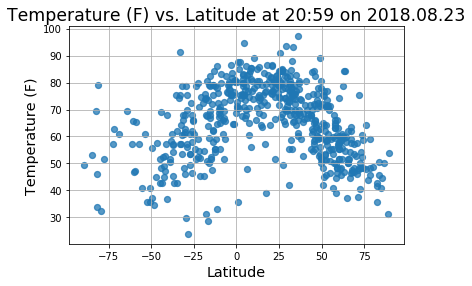

In [7]:
# First Scatter Plot Temp vs. Lat

plt.scatter(cities_df['Latitude'], cities_df['Temperature (F)'], alpha = .75, linewidths=1.25)

# Incorporate the other graph properties

plt.title(f"Temperature (F) vs. Latitude at {time_string}", fontsize = 'xx-large')
plt.ylabel("Temperature (F)", fontsize = 'x-large')
plt.xlabel("Latitude", fontsize = 'x-large')
plt.grid()

#Show and Save Plot

plt.savefig('../images/plot1.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

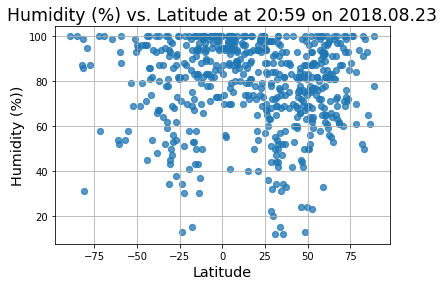

In [8]:
# Second Scatter Plot Humidity vs. Lat

plt.scatter(cities_df['Latitude'], cities_df['Humidity (%)'], alpha = .75, linewidths=1.25)

# Incorporate the other graph properties

plt.title(f"Humidity (%) vs. Latitude at {time_string}", fontsize = 'xx-large')
plt.ylabel("Humidity (%))", fontsize = 'x-large')
plt.xlabel("Latitude", fontsize = 'x-large')
plt.grid()

#Show and Save Plot

plt.savefig('../images/plot2.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

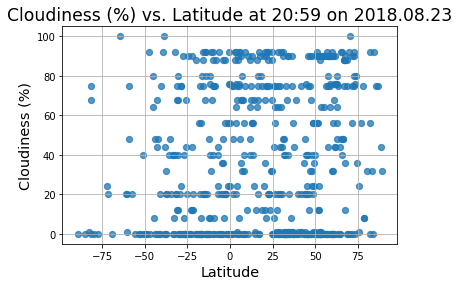

In [9]:
# Third Scatter Plot Clouds vs. Lat

plt.scatter(cities_df['Latitude'], cities_df['Cloudiness (%)'], alpha = .75, linewidths=1.25)

# Incorporate the other graph properties

plt.title(f"Cloudiness (%) vs. Latitude at {time_string}", fontsize = 'xx-large')
plt.ylabel("Cloudiness (%)", fontsize = 'x-large')
plt.xlabel("Latitude", fontsize = 'x-large')
plt.grid()

#Show and Save Plot

plt.savefig('../images/plot3.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

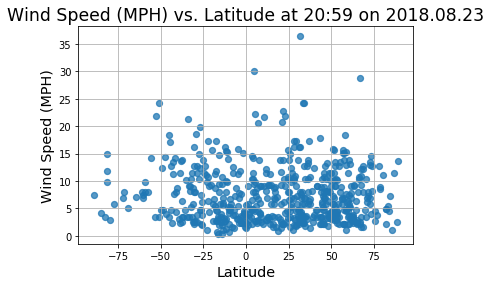

In [10]:
# Fourth Scatter Plot Clouds vs. Lat

plt.scatter(cities_df['Latitude'], cities_df['Wind Speed (MPH)'], alpha = .75, linewidths=1.25)

# Incorporate the other graph properties

plt.title(f"Wind Speed (MPH) vs. Latitude at {time_string}", fontsize = 'xx-large')
plt.ylabel("Wind Speed (MPH)", fontsize = 'x-large')
plt.xlabel("Latitude", fontsize = 'x-large')
plt.grid()

#Show and Save Plot

plt.savefig('../images/plot4.png')
plt.show